Build a regression model.

Provide model output and an interpretation of the results. 

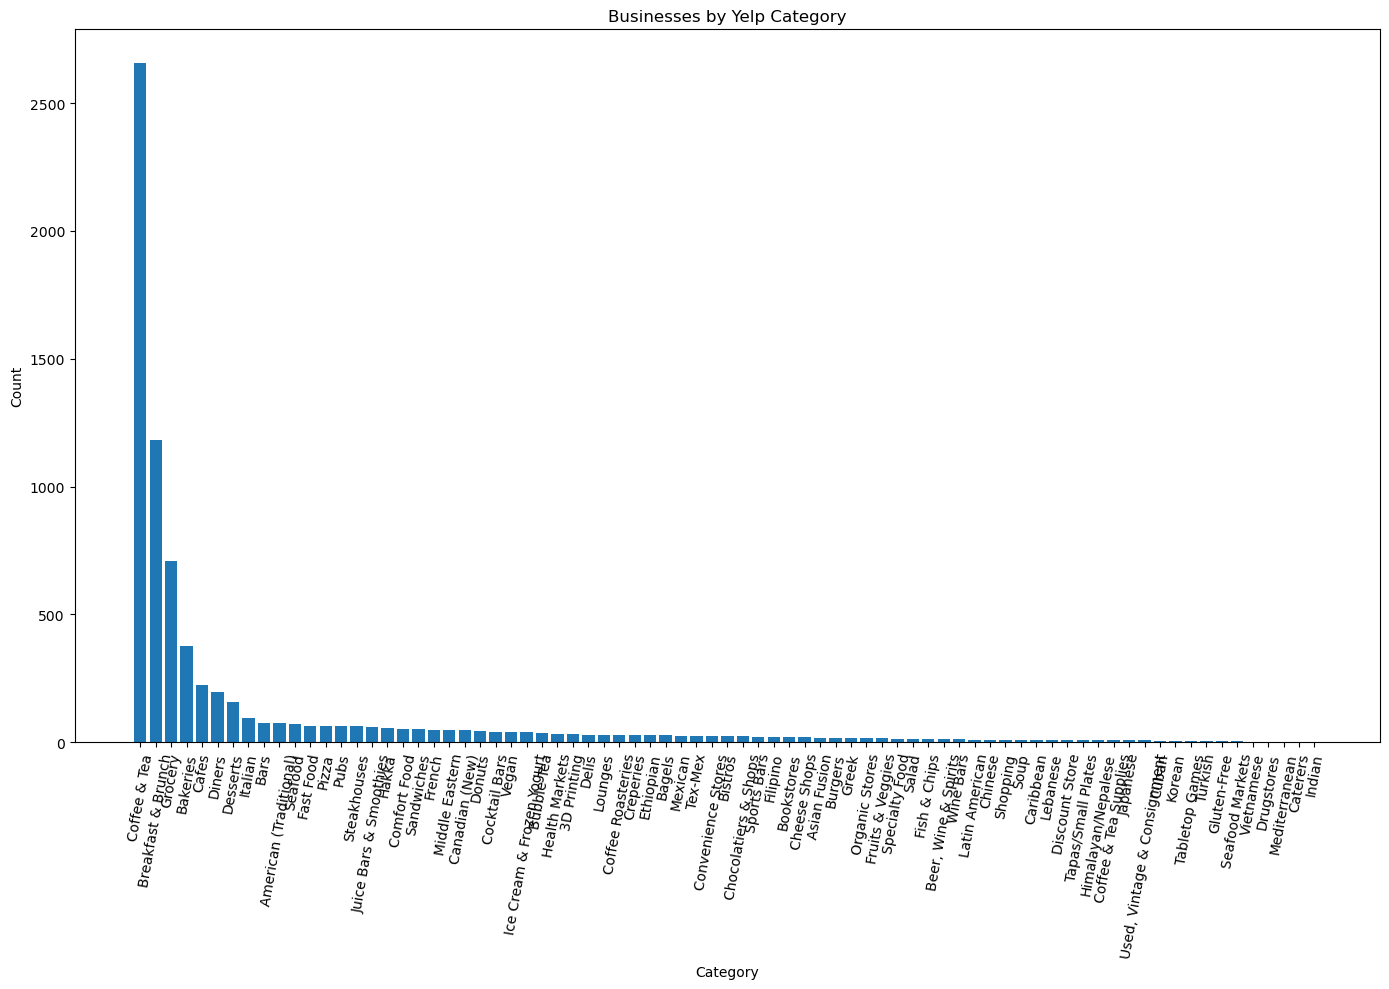

In [17]:
#We're creating a bar chart using the Matplotlib data visualization library

import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for the CSV file
csv_file_yelp = "yelp.csv"

# Reading the data from the CSV file into a pandas DataFrame
yelp_dataframe = pd.read_csv(csv_file_yelp)

# Counting the number of businesses in each category
category_counts = yelp_dataframe['POI_category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(14, 10))  # Increase the figure size (width, height)
plt.bar(category_counts.index, category_counts.values)

# Setting chart title and labels
plt.title('Businesses by Yelp Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels so it can be easily read
plt.xticks(rotation=80)

# Adjust plot layout 
plt.tight_layout()

# Display the chart
plt.show()

#We noticed that Cofee&Tea POI was the most popular POI in that occured in the bikestations! Followed by Breakfast & Brunch.

In [41]:
# Getting Information about the dataset to confirm firm number of null values and data types
# Although we see some co,umns that have null values, we won't be using them during the EDA and model regression
#So we will leave them be. No need to do anything with these columns since we wont be using them.

yelp_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7342 entries, 0 to 7341
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7342 non-null   object 
 1   alias                     7342 non-null   object 
 2   name                      7342 non-null   object 
 3   image_url                 7227 non-null   object 
 4   is_closed                 7342 non-null   bool   
 5   url                       7342 non-null   object 
 6   review_count              7342 non-null   int64  
 7   categories                7342 non-null   object 
 8   rating                    7342 non-null   float64
 9   coordinates               7342 non-null   object 
 10  transactions              7342 non-null   object 
 11  price                     5580 non-null   object 
 12  location                  7342 non-null   object 
 13  phone                     6784 non-null   float64
 14  display_

In [42]:
# Generate descriptive statistics for each numeric feature
yelp_dataframe.describe()

,review_count,rating,phone,distance,Latitude,Longitude
count,7342.000000,7342.000000,6.784000e+03,7342.000000,7342.000000,7342.000000
mean,108.242305,3.930469,1.477851e+10,651.400509,43.661437,-79.394111
std,159.592489,0.656483,1.137354e+09,483.690470,0.019579,0.043508
min,1.000000,1.000000,1.289645e+10,2.120307,43.588077,-79.543207
25%,15.000000,3.500000,1.416532e+10,357.458487,43.649147,-79.420317
50%,43.000000,4.000000,1.416779e+10,639.967281,43.659471,-79.392480
75%,132.000000,4.500000,1.437801e+10,902.281937,43.670000,-79.372637
max,1026.000000,5.000000,1.905984e+10,10306.340379,43.778112,-79.197129


In [43]:
yelp_dataframe_numeric = yelp_dataframe[['review_count',
       'rating', 'distance', 'Latitude', 'Longitude']]

In [44]:
# Absolute correlation matrix for numeric features in the dataframe
corr_matrix = yelp_dataframe_numeric.corr()
corr_matrix.style.background_gradient()

,review_count,rating,distance,Latitude,Longitude
review_count,1.000000,-0.041033,0.046490,-0.184096,0.047417
rating,-0.041033,1.000000,0.073546,-0.096863,-0.016300
distance,0.046490,0.073546,1.000000,0.056979,0.024924
Latitude,-0.184096,-0.096863,0.056979,1.000000,0.284615
Longitude,0.047417,-0.016300,0.024924,0.284615,1.000000


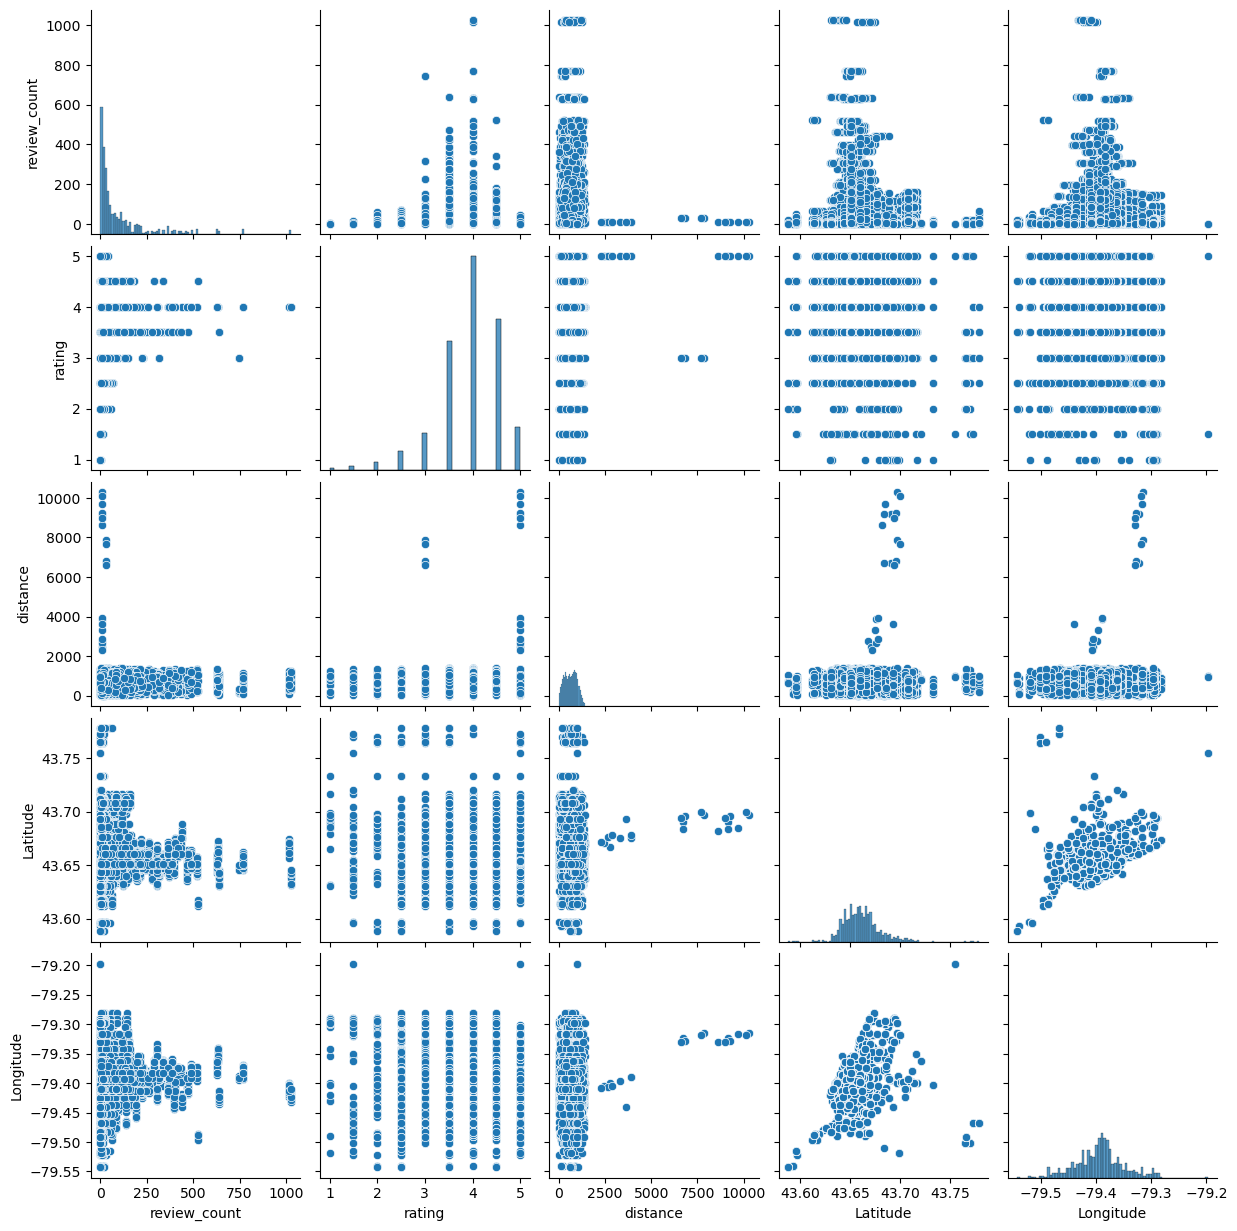

In [45]:
# Correlation plots for each numeric feature
sns.pairplot(data=yelp_dataframe_numeric)

We see the majority of POIs within 1000m of bike stations have high ratings


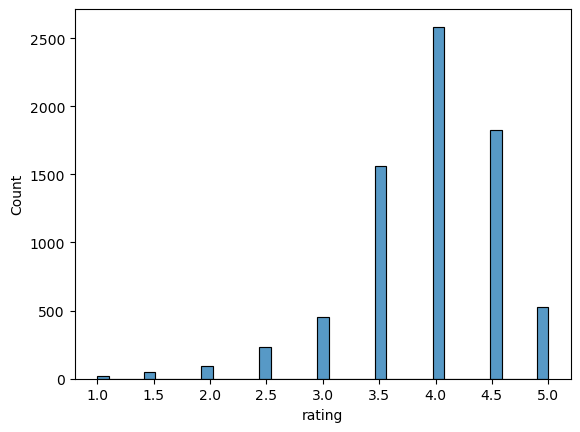

In [47]:
# Histogram to view the distribution of POI_ratings
sns.histplot(yelp_dataframe['rating'])
print("We see the majority of POIs within 1000m of bike stations have high ratings")

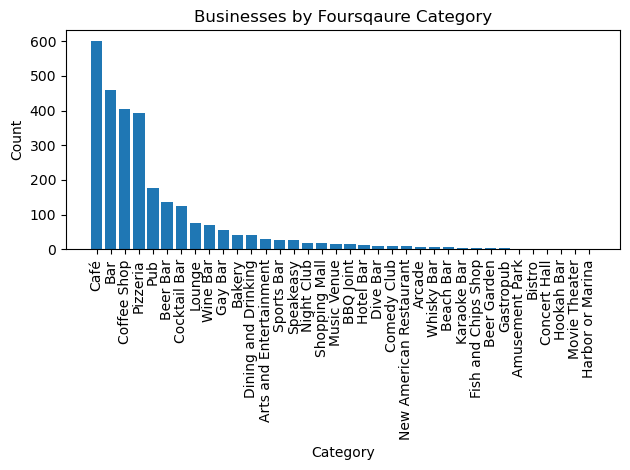

We see a common trend with both YELP and Foursquare API. That Cafes are the most common POI in Foursqaure's with the Toronto's bike stations.


In [51]:
#We're creating a bar chart using the Matplotlib data visualization library

import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for the CSV file
csv_file_foursqaure = "foursquare_data.csv"

# Reading the data from the CSV file into a pandas DataFrame
Foursquare_df = pd.read_csv(csv_file_foursqaure)

# Counting the number of businesses in each category
category_counts = Foursquare_df['categories'].value_counts()

# Plot the bar chart
plt.bar(category_counts.index, category_counts.values)

# Set chart title and labels
plt.title('Businesses by Foursqaure Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Adjust plot layout if needed
plt.tight_layout()

# Display the chart
plt.show()

print("We see a common trend with both YELP and Foursquare API. That Cafes are the most common POI in Foursqaure's with the Toronto's bike stations.")

In [53]:
#this shows all the bike statons in toronto
import folium
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for the CSV file
csv_file_city = "city_data.csv"

# Reading the data from the CSV file into a pandas DataFrame
df1 = pd.read_csv(csv_file_city)


center_lat = df1.at[0, 'latitude']
center_lon = df1.at[0, 'longitude']
map_yelp = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for index, row in df1.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    folium.Marker([lat, lon]).add_to(map_yelp)



map_yelp
print("You can toggle the map to view the bike stations around Toronto")

You can toggle the map to view the bike stations around Toronto


In [ ]:
#We will check to see what the distribution of Distance of POIs within each Bikestation with the visualization below using the 
#Foursquare API data.

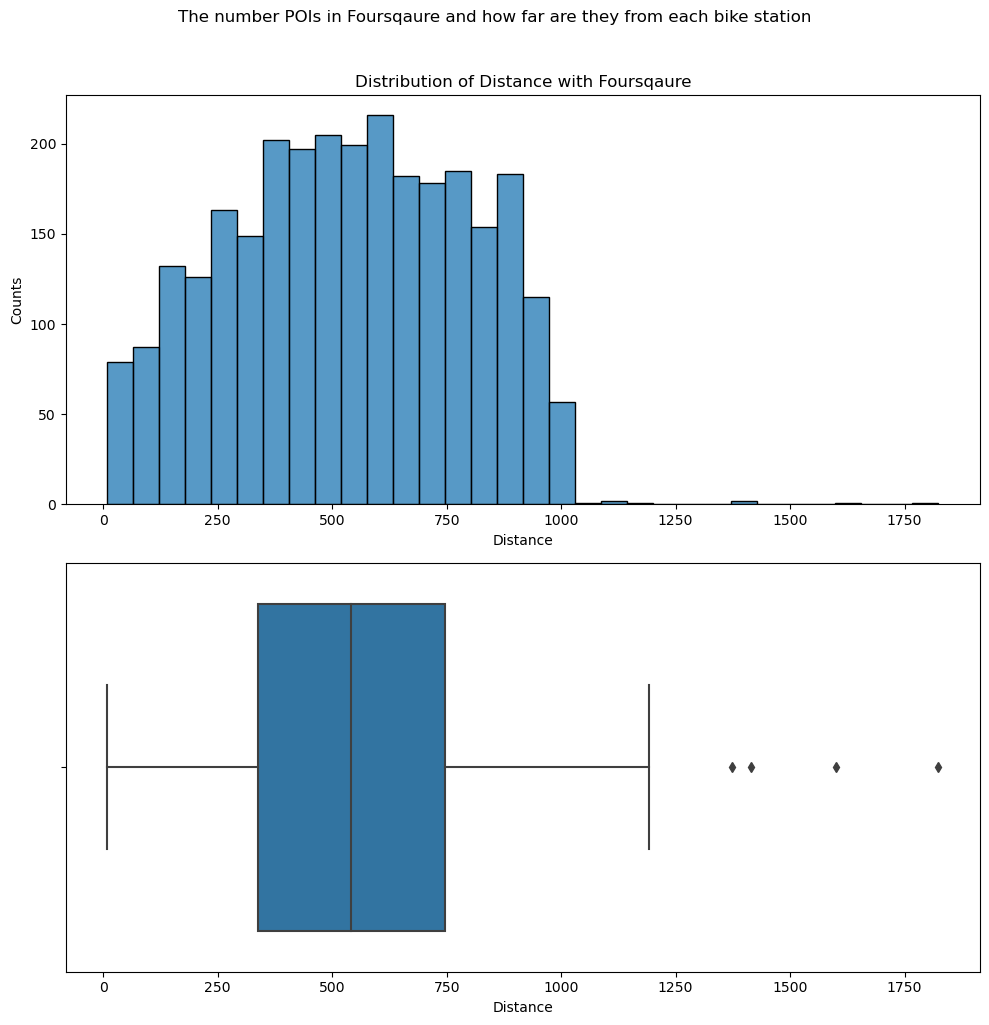

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Histogram
sns.histplot(Foursquare_df['distance'], ax=axes[0])
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Counts')
axes[0].set_title('Distribution of Distance with Foursqaure')

# Boxplot
sns.boxplot(x=Foursquare_df['distance'], ax=axes[1])
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('')

plt.suptitle('The number POIs in Foursqaure and how far are they from each bike station', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
#Building a linear regression model based on the 'distance' as the independent variable and the poi_count as the 
#dependent variable. 

In [5]:
#Linear Regression to predict the "rating" of businesses based on their "review_count" from the Yelp dataset. 

import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the file path for the CSV file
csv_file_yelp = "yelp.csv"

# Reading the data from the CSV file into a pandas DataFrame
yelp_dataframe = pd.read_csv(csv_file_yelp)


# We will use 'review_count' as the feature (X) and 'rating' as the target variable (y)
X = yelp_dataframe['review_count']
y = yelp_dataframe['rating']

# We will split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the Linear Regression model
reg_model = LinearRegression()

# Step 4: Train the model using the training data
reg_model.fit(X_train.values.reshape(-1, 1), y_train)  # Reshape X_train to a 2D array as required by scikit-learn

# Step 5: Make predictions on the testing data
y_pred = reg_model.predict(X_test.values.reshape(-1, 1))  # Reshape X_test similarly

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Interpret the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

# Interpretation of results
print("The Linear Regression model successfully predicts the 'rating' of businesses based on their 'review_count'.")
print("A low Mean Squared Error indicates that the model's predictions are very close to the actual 'rating' values in the test set.")
print("Based on the results, it seems that the linear regression model built to predict business ratings using the 'review_count' feature is not performing very well. The low R-squared value suggests that the 'review_count' alone may not be a strong predictor of business ratings in this dataset. Other factors might play a more significant role in determining the ratings.")





Mean Squared Error (MSE): 0.43288239298148384
R-squared (R^2): 0.0010300199595277837
The Linear Regression model successfully predicts the 'rating' of businesses based on their 'review_count'.
A low Mean Squared Error indicates that the model's predictions are very close to the actual 'rating' values in the test set.
Based on the results, it seems that the linear regression model built to predict business ratings using the 'review_count' feature is not performing very well. The low R-squared value suggests that the 'review_count' alone may not be a strong predictor of business ratings in this dataset. Other factors might play a more significant role in determining the ratings.


# Stretch

How can you turn the regression model into a classification model?